In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import pyarrow.parquet

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, silhouette_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
X_train = pd.read_parquet("00_dataset/without_stopwords/tfidfWithNGram/svd/X_train_svd.parquet")
X_test = pd.read_parquet("00_dataset/without_stopwords/tfidfWithNGram/svd/X_test_svd.parquet")
X_val = pd.read_parquet("00_dataset/without_stopwords/tfidfWithNGram/svd/X_val_svd.parquet")

y_train = pd.read_parquet("00_dataset/without_stopwords/tfidfWithNGram/svd/y_train.parquet")
y_test = pd.read_parquet("00_dataset/without_stopwords/tfidfWithNGram/svd/y_test.parquet")
y_val = pd.read_parquet("00_dataset/without_stopwords/tfidfWithNGram/svd/y_val.parquet")

In [ ]:
# Feature Scaling
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Save the scaler
joblib.dump(scaler, "00_dataset/without_stopwords/tfidfWithNGram/svd/scaler_svd.joblib")
print("MinMaxScaler saved")

MinMaxScaler saved


In [4]:
# Load Min Max Scaler
mms = joblib.load('00_dataset/without_stopwords/tfidfWithNGram/svd/after/scaler_svd.joblib')
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)
X_val_scaled = mms.transform(X_val)

In [4]:
# Check class distribution after split
print("Train Class Distribution:\n", y_train.value_counts(normalize=True))
print("\nValidation Class Distribution:\n", y_val.value_counts(normalize=True))
print("\nTest Class Distribution:\n", y_test.value_counts(normalize=True))

Train Class Distribution:
 label
0        0.867799
1        0.132201
Name: proportion, dtype: float64

Validation Class Distribution:
 label
0        0.867797
1        0.132203
Name: proportion, dtype: float64

Test Class Distribution:
 label
0        0.867797
1        0.132203
Name: proportion, dtype: float64


In [7]:
print("Contains negative values:", np.any(X_train_scaled < 0))


Contains negative values: False


In [5]:
# Convert y_train to 1D array
y_train_fixed = y_train.values.ravel()
y_val_fixed = y_val.values.ravel()
y_test_fixed = y_test.values.ravel()

print("y_train_fixed shape:", y_train_fixed.shape)

y_train_fixed shape: (425920,)


In [11]:
nb = MultinomialNB(fit_prior=True)
nb.fit(X_train_scaled, y_train_fixed)

# Save the model
joblib.dump(nb, '00_dataset/without_stopwords/tfidfWithNGram/svd/after/nb/nb.joblib')
print("Naive Bayes training completed and saved.")

Naive Bayes training completed and saved.


Validation Accuracy: 0.8678

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     52802
           1       0.00      0.00      0.00      8044

    accuracy                           0.87     60846
   macro avg       0.43      0.50      0.46     60846
weighted avg       0.75      0.87      0.81     60846



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC-AUC Score:  0.721581465757884


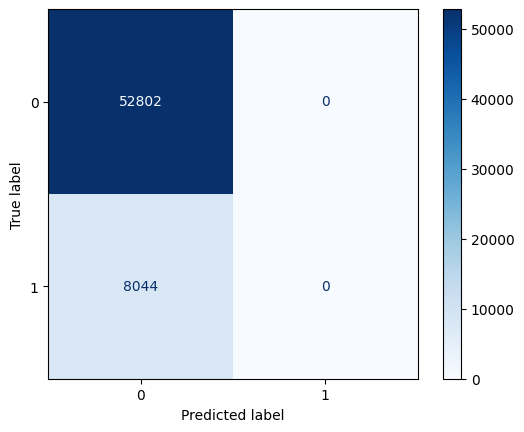

In [18]:
# Load the last saved model
nb = joblib.load('00_dataset/without_stopwords/tfidfWithNGram/svd/after/nb/nb.joblib')

# Predict on validation data
y_val_pred = nb.predict(X_val_scaled)

# Evaluate performance
accuracy = accuracy_score(y_val_fixed, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_val_fixed, y_val_pred))

# Compute ROC-AUC
y_proba = nb.predict_proba(X_val_scaled)[:, 1]
print("ROC-AUC Score: ", roc_auc_score(y_val_fixed, y_proba))

# Generate confusion matrix
cm = confusion_matrix(y_val_fixed, y_val_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")  # Choose a color map for visualization

In [14]:
nb = MultinomialNB(class_prior=[0.5, 0.5])
nb.fit(X_train_scaled, y_train_fixed)

# Save the model
joblib.dump(nb, '00_dataset/without_stopwords/tfidfWithNGram/svd/after/nb/classweights_nb.joblib')
print("Naive Bayes training completed and saved.")

Naive Bayes training completed and saved.


Validation Accuracy: 0.6931

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80     52802
           1       0.24      0.61      0.35      8044

    accuracy                           0.69     60846
   macro avg       0.58      0.66      0.57     60846
weighted avg       0.83      0.69      0.74     60846

ROC-AUC Score:  0.721581465757884


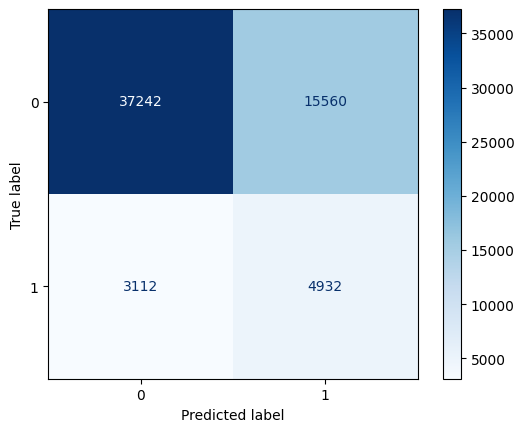

In [15]:
# Load the last saved model
# nb = joblib.load('00_dataset/without_stopwords/tfidfWithNGram/nb/classweights_nb.joblib')

# Predict on validation data
y_val_pred = nb.predict(X_val_scaled)

# Evaluate performance
accuracy = accuracy_score(y_val_fixed, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_val_fixed, y_val_pred))

# Compute ROC-AUC
y_proba = nb.predict_proba(X_val_scaled)[:, 1]
print("ROC-AUC Score: ", roc_auc_score(y_val_fixed, y_proba))

# Generate confusion matrix
cm = confusion_matrix(y_val_fixed, y_val_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")  # Choose a color map for visualization

In [16]:
nb70 = MultinomialNB(class_prior=[0.3, 0.7])
nb70.fit(X_train_scaled, y_train_fixed)

# Save the model
joblib.dump(nb70, '00_dataset/without_stopwords/tfidfWithNGram/svd/after/nb/classweights70_nb.joblib')
print("Naive Bayes training completed and saved.")

Naive Bayes training completed and saved.


Validation Accuracy: 0.1322

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     52802
           1       0.13      1.00      0.23      8044

    accuracy                           0.13     60846
   macro avg       0.07      0.50      0.12     60846
weighted avg       0.02      0.13      0.03     60846



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC-AUC Score:  0.721581465757884


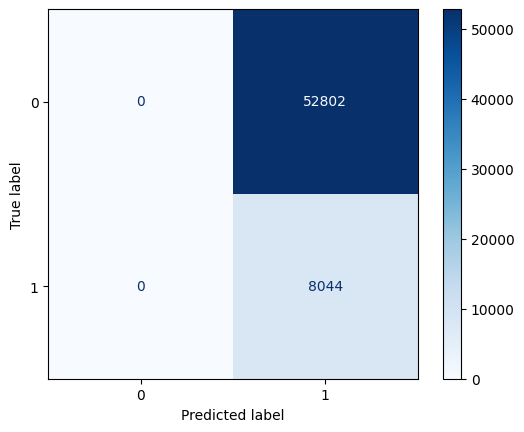

In [17]:
# Load the last saved model
# nb70 = joblib.load('00_dataset/without_stopwords/tfidfWithNGram/nb/classweights70_nb.joblib')

# Predict on validation data
y_val_pred = nb70.predict(X_val_scaled)

# Evaluate performance
accuracy = accuracy_score(y_val_fixed, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_val_fixed, y_val_pred))

# Compute ROC-AUC
y_proba = nb70.predict_proba(X_val_scaled)[:, 1]
print("ROC-AUC Score: ", roc_auc_score(y_val_fixed, y_proba))

# Generate confusion matrix
cm = confusion_matrix(y_val_fixed, y_val_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")  # Choose a color map for visualization

Validation Accuracy: 0.8678

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     52802
           1       0.00      0.00      0.00      8044

    accuracy                           0.87     60846
   macro avg       0.43      0.50      0.46     60846
weighted avg       0.75      0.87      0.81     60846



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC-AUC Score:  0.721581465757884


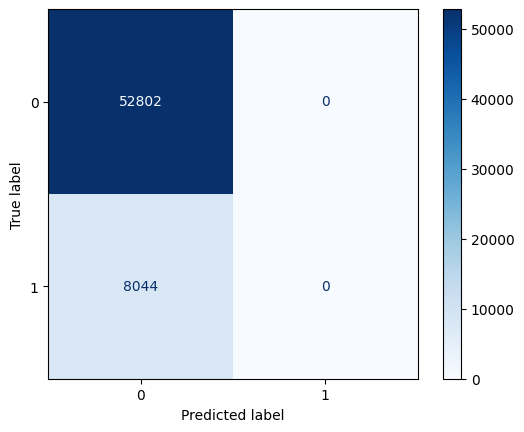

In [24]:
nb20 = MultinomialNB(fit_prior=True)
nb20.fit(X_train_scaled, y_train_fixed)

# Predict on validation data
y_val_pred = nb20.predict(X_val_scaled)

# Evaluate performance
accuracy = accuracy_score(y_val_fixed, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_val_fixed, y_val_pred))

# Compute ROC-AUC
y_proba = nb20.predict_proba(X_val_scaled)[:, 1]
print("ROC-AUC Score: ", roc_auc_score(y_val_fixed, y_proba))

# Generate confusion matrix
cm = confusion_matrix(y_val_fixed, y_val_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")  # Choose a color map for visualization

# Apply SMOTE

In [6]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train_fixed)

In [7]:
# Save SMOTE-transformed dataset
joblib.dump((X_train_smote, y_train_smote), "00_dataset/without_stopwords/tfidfWithNGram/svd/after/smoteAuto_resampled.joblib")
print("SMOTE-transformed dataset saved successfully.")

SMOTE-transformed dataset saved successfully.


In [8]:
# Check class distribution before and after SMOTE
print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", pd.Series(y_train_smote).value_counts())

Before SMOTE:
 label
0        369613
1         56307
Name: count, dtype: int64

After SMOTE:
 0    369613
1    369613
Name: count, dtype: int64


In [ ]:
nb_smote = MultinomialNB(class_prior=[0.5, 0.5], fit_prior=False)
nb_smote.fit(X_train_smote, y_train_smote)

# Save the model
joblib.dump(nb_smote, '00_dataset/without_stopwords/tfidfWithNGram/svd/after/nb/nb_smote.joblib')
print("Naive Bayes with SMOTE training completed and saved.")

Naive Bayes with SMOTE training completed and saved.


Validation Accuracy: 0.7661

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86     52802
           1       0.21      0.29      0.24      8044

    accuracy                           0.77     60846
   macro avg       0.55      0.56      0.55     60846
weighted avg       0.80      0.77      0.78     60846

ROC-AUC Score:  0.6391611576087588


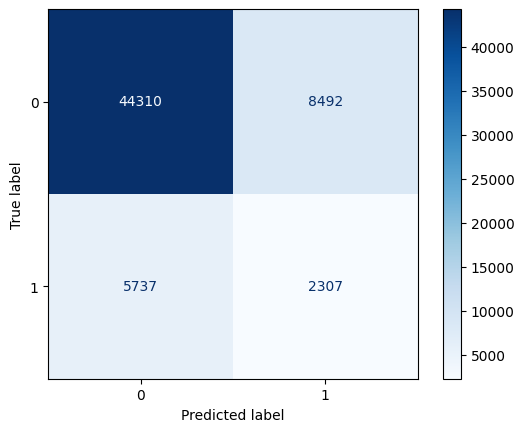

In [11]:
# Load the last saved model
#nb_smote = joblib.load('00_dataset/without_stopwords/tfidfWithNGram/smote/nb_smote.joblib')

# Predict on validation data
y_val_pred = nb_smote.predict(X_val_scaled)

# Evaluate performance
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Compute ROC-AUC
y_proba = nb_smote.predict_proba(X_val_scaled)[:, 1]
print("ROC-AUC Score: ", roc_auc_score(y_val, y_proba))

# Generate confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")  # Choose a color map for visualization

In [12]:
smote75 = SMOTE(sampling_strategy=0.75, random_state=42)
X_train_smote75, y_train_smote75 = smote75.fit_resample(X_train_scaled, y_train_fixed)

joblib.dump((X_train_smote75, y_train_smote75), "00_dataset/without_stopwords/tfidfWithNGram/svd/after/smote75_resampled.joblib")
print("SMOTE75-transformed dataset saved successfully.")

SMOTE75-transformed dataset saved successfully.


Naive Bayes with SMOTE75 training completed and saved.
Validation Accuracy: 0.8678

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     52802
           1       0.00      0.00      0.00      8044

    accuracy                           0.87     60846
   macro avg       0.43      0.50      0.46     60846
weighted avg       0.75      0.87      0.81     60846



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC-AUC Score:  0.6434163702793606


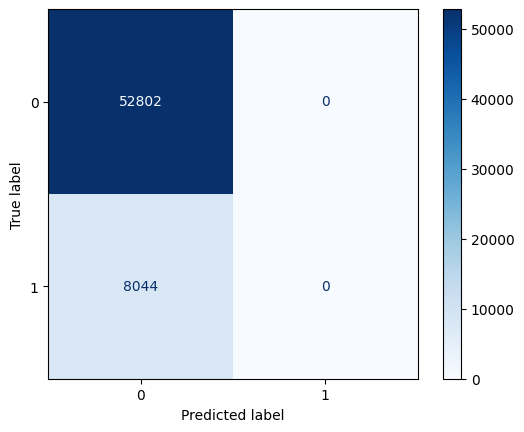

In [14]:
nb_smote75 = MultinomialNB()
nb_smote75.fit(X_train_smote75, y_train_smote75)

# Save the model
joblib.dump(nb_smote75, '00_dataset/without_stopwords/tfidfWithNGram/svd/after/nb/nb_smote75.joblib')
print("Naive Bayes with SMOTE75 training completed and saved.")

# Predict on validation data
y_val_pred = nb_smote75.predict(X_val_scaled)

# Evaluate performance
accuracy = accuracy_score(y_val_fixed, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Compute ROC-AUC
y_proba = nb_smote75.predict_proba(X_val_scaled)[:, 1]
print("ROC-AUC Score: ", roc_auc_score(y_val_fixed, y_proba))

# Generate confusion matrix
cm = confusion_matrix(y_val_fixed, y_val_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")  # Choose a color map for visualization

In [15]:
smote50 = SMOTE(sampling_strategy=0.50, random_state=42)
X_train_smote50, y_train_smote50 = smote50.fit_resample(X_train_scaled, y_train_fixed)

joblib.dump((X_train_smote50, y_train_smote50), "00_dataset/without_stopwords/tfidfWithNGram/svd/after/smote50_resampled.joblib")
print("SMOTE50-transformed dataset saved successfully.")

SMOTE50-transformed dataset saved successfully.


Naive Bayes with SMOTE75 training completed and saved.
Validation Accuracy: 0.8678

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     52802
           1       0.00      0.00      0.00      8044

    accuracy                           0.87     60846
   macro avg       0.43      0.50      0.46     60846
weighted avg       0.75      0.87      0.81     60846



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC-AUC Score:  0.6529036230808958


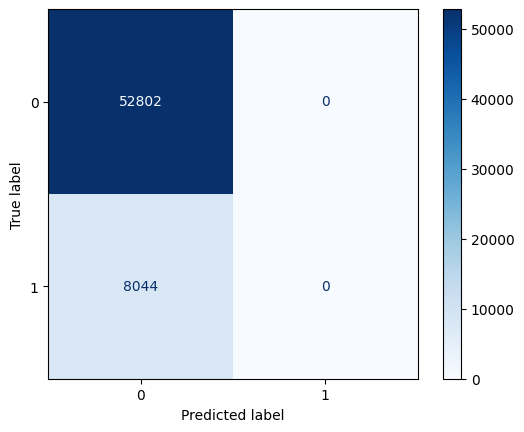

In [16]:
nb_smote50 = MultinomialNB()
nb_smote50.fit(X_train_smote50, y_train_smote50)

# Save the model
joblib.dump(nb_smote75, '00_dataset/without_stopwords/tfidfWithNGram/svd/after/nb/nb_smote50.joblib')
print("Naive Bayes with SMOTE75 training completed and saved.")

# Predict on validation data
y_val_pred = nb_smote50.predict(X_val_scaled)

# Evaluate performance
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Compute ROC-AUC
y_proba = nb_smote50.predict_proba(X_val_scaled)[:, 1]
print("ROC-AUC Score: ", roc_auc_score(y_val, y_proba))

# Generate confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")  # Choose a color map for visualization

In [18]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train_fixed)

Validation Accuracy: 0.1322

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     52802
           1       0.13      1.00      0.23      8044

    accuracy                           0.13     60846
   macro avg       0.07      0.50      0.12     60846
weighted avg       0.02      0.13      0.03     60846



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC-AUC Score:  0.721581465757884


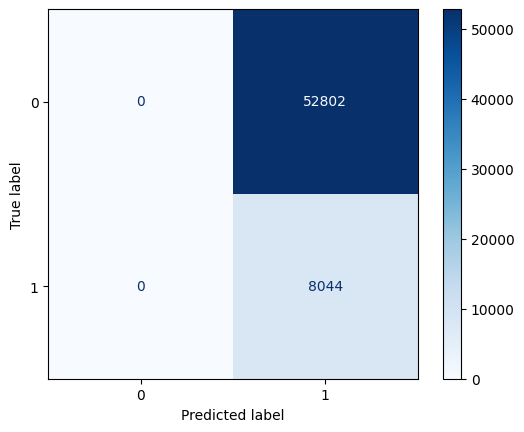

In [21]:
nb = MultinomialNB(class_prior=class_weights)
nb.fit(X_train_scaled, y_train_fixed)

# Predict on validation data
y_val_pred = nb.predict(X_val_scaled)

# Evaluate performance
accuracy = accuracy_score(y_val_fixed, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Compute ROC-AUC
y_proba = nb.predict_proba(X_val_scaled)[:, 1]
print("ROC-AUC Score: ", roc_auc_score(y_val_fixed, y_proba))

# Generate confusion matrix
cm = confusion_matrix(y_val_fixed, y_val_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")  # Choose a color map for visualization

## Using withour SMOTE to test out for the other models

### Logistic Regression

In [22]:
# Train Logistic Regression
lr = LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga', random_state=42, n_jobs=-1)
lr.fit(X_train_scaled, y_train_fixed)

# Save the model
joblib.dump(lr, '00_dataset/without_stopwords/tfidfWithNGram/svd/after/lr/lr.joblib')
print("Logistic Regression training completed and saved.")

Logistic Regression training completed and saved.


Validation Accuracy: 0.6764

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.68      0.78     52802
           1       0.24      0.68      0.36      8044

    accuracy                           0.68     60846
   macro avg       0.59      0.68      0.57     60846
weighted avg       0.84      0.68      0.73     60846

ROC-AUC Score:  0.7416033032479915


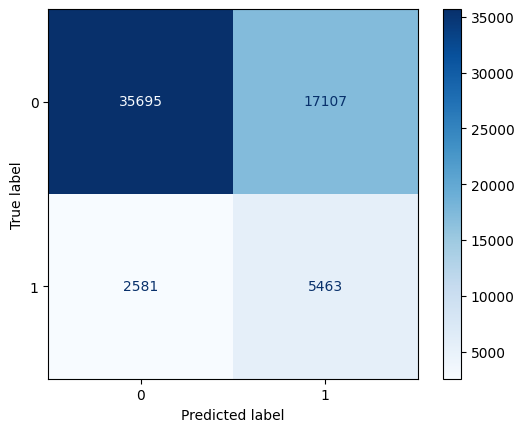

In [23]:
# Load the last saved model
# lr = joblib.load('00_dataset/without_stopwords/lr_classweights/lr.joblib') # Replace X with the last batch number

# Predict on validation data
y_val_pred = lr.predict(X_val_scaled)

# Evaluate performance
accuracy = accuracy_score(y_val_fixed, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_val_fixed, y_val_pred))

# Compute ROC-AUC
y_proba = lr.predict_proba(X_val_scaled)[:, 1]
print("ROC-AUC Score: ", roc_auc_score(y_val_fixed, y_proba))

# Generate confusion matrix
cm = confusion_matrix(y_val_fixed, y_val_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")  # Choose a color map for visualization

### Random Forest

In [24]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train_scaled, y_train_fixed)

# Save the model
joblib.dump(rf, '00_dataset/without_stopwords/tfidfWithNGram/svd/after/rf/rf.joblib')
print("Random Forest training completed and saved.")

Random Forest training completed and saved.


Validation Accuracy: 0.8673

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     52802
           1       0.44      0.01      0.02      8044

    accuracy                           0.87     60846
   macro avg       0.65      0.51      0.48     60846
weighted avg       0.81      0.87      0.81     60846

ROC-AUC Score:  0.6477201244919919


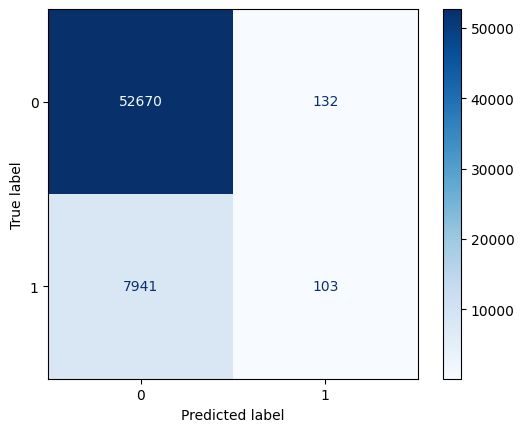

In [26]:
# Predict on validation data
y_val_pred = rf.predict(X_val_scaled)

# Evaluate performance
accuracy = accuracy_score(y_val_fixed, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_val_fixed, y_val_pred))

# Compute ROC-AUC
y_proba = rf.predict_proba(X_val_scaled)[:, 1]
print("ROC-AUC Score: ", roc_auc_score(y_val, y_proba))

# Generate confusion matrix
cm = confusion_matrix(y_val_fixed, y_val_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")  # Choose a color map for visualization

### Hyperparameter with Logistic regression

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the model
logreg = LogisticRegression(class_weight='balanced', random_state=42)

# Define the hyperparameter grid
param_dist = {
    'C': uniform(0.01, 10),  # Continuous range for `C` (more flexibility)
    'solver': ['lbfgs', 'sag', 'saga'],  
    'max_iter': [500, 1000]  # Prevents convergence warnings
}

random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, 
                                   n_iter=20, cv=3, scoring='roc_auc', 
                                   n_jobs=1, verbose=2, random_state=42)
random_search.fit(X_train_scaled, y_train_fixed)

# Best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate on validation set
best_logreg = random_search.best_estimator_
y_val_pred = best_logreg.predict(X_val_scaled)

# Performance metrics
from sklearn.metrics import classification_report, roc_auc_score
print("\nClassification Report:\n", classification_report(y_val_fixed, y_val_pred))
print("ROC-AUC Score: ", roc_auc_score(y_val_fixed, best_logreg.predict_proba(X_val_scaled)[:, 1]))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ....C=3.7554011884736247, max_iter=500, solver=saga; total time= 8.9min
[CV] END ....C=3.7554011884736247, max_iter=500, solver=saga; total time= 6.5min
[CV] END ....C=3.7554011884736247, max_iter=500, solver=saga; total time= 6.9min
[CV] END ...C=7.3299394181140505, max_iter=500, solver=lbfgs; total time=  39.3s
[CV] END ...C=7.3299394181140505, max_iter=500, solver=lbfgs; total time= 1.7min
[CV] END ...C=7.3299394181140505, max_iter=500, solver=lbfgs; total time= 1.9min
[CV] END ....C=1.5701864044243652, max_iter=500, solver=saga; total time= 7.1min
[CV] END ....C=1.5701864044243652, max_iter=500, solver=saga; total time= 6.6min
[CV] END ....C=1.5701864044243652, max_iter=500, solver=saga; total time= 6.4min
[CV] END ..C=0.5908361216819946, max_iter=1000, solver=lbfgs; total time= 1.1min
[CV] END ..C=0.5908361216819946, max_iter=1000, solver=lbfgs; total time= 1.0min
[CV] END ..C=0.5908361216819946, max_iter=1000, 

c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=0.21584494295802448, max_iter=1000, solver=sag; total time=103.2min


c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=0.21584494295802448, max_iter=1000, solver=sag; total time=119.4min


c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=0.21584494295802448, max_iter=1000, solver=sag; total time=91.8min
[CV] END ..C=2.1333911067827613, max_iter=1000, solver=lbfgs; total time= 1.0min
[CV] END ..C=2.1333911067827613, max_iter=1000, solver=lbfgs; total time= 1.1min
[CV] END ..C=2.1333911067827613, max_iter=1000, solver=lbfgs; total time= 1.5min
[CV] END .....C=6.184815096277165, max_iter=1000, solver=sag; total time=13.8min
[CV] END .....C=6.184815096277165, max_iter=1000, solver=sag; total time= 7.1min
[CV] END .....C=6.184815096277165, max_iter=1000, solver=sag; total time= 6.6min
[CV] END ..C=0.08066305219717405, max_iter=500, solver=lbfgs; total time= 1.1min
[CV] END ..C=0.08066305219717405, max_iter=500, solver=lbfgs; total time=  52.5s
[CV] END ..C=0.08066305219717405, max_iter=500, solver=lbfgs; total time= 1.4min
[CV] END ......C=5.257746602583891, max_iter=500, solver=sag; total time=14.0min
[CV] END ......C=5.257746602583891, max_iter=500, solver=sag; total time= 9.2min
[CV] END ......C=5.257746602

In [9]:
print("Best Hyperparameters:", random_search.best_params_)

print("\nClassification Report:\n", classification_report(y_val_fixed, y_val_pred))
print("ROC-AUC Score: ", roc_auc_score(y_val_fixed, best_logreg.predict_proba(X_val_scaled)[:, 1]))


Best Hyperparameters: {'C': 0.08066305219717405, 'max_iter': 500, 'solver': 'lbfgs'}

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.68      0.78     52802
           1       0.24      0.68      0.36      8044

    accuracy                           0.68     60846
   macro avg       0.59      0.68      0.57     60846
weighted avg       0.84      0.68      0.73     60846

ROC-AUC Score:  0.7418949527456947


# Apply SMOTE + Tomek
Adds minority samples (SMOTE) & removes noisy majority samples (Tomek)

In [ ]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(sampling_strategy=0.5, random_state=42, n_jobs=-1)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train_scaled, y_train)

joblib.dump((X_train_smote_tomek, y_train_smote_tomek), "smotetomek50_resampled.joblib")

SMOTE Tomek will be scrape as it is taking too long to compute. (> 160 mins)

In [ ]:
nb_smote_tomek = MultinomialNB(class_prior=[0.5, 0.5])
nb_smote_tomek.fit(X_train_smote_tomek, y_train_smote_tomek)

# Save the model
joblib.dump(nb_smote_tomek, '00_dataset/without_stopwords/nb_classweights/nb_smote_tomek.joblib')
print("Naive Bayes with SMOTE Tomek training completed and saved.")

In [ ]:
# Load the last saved model
nb_smote_tomek = joblib.load('00_dataset/without_stopwords/nb_classweights/nb_smote_tomek.joblib')

# Predict on validation data
y_val_pred = nb_smote_tomek.predict(X_val_scaled)

# Evaluate performance
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Compute ROC-AUC
y_proba = nb_smote_tomek.predict_proba(X_val_scaled)[:, 1]
print("ROC-AUC Score: ", roc_auc_score(y_val, y_proba))

# Generate confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")  # Choose a color map for visualization

In [ ]:
# Train Logistic Regression
lr_smote_tomek = LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga')
lr_smote_tomek.fit(X_train_smote_tomek, y_train_smote_tomek)

# Save the model
joblib.dump(lr_smote_tomek, '00_dataset/without_stopwords/lr_classweights/lr_smote_tomek.joblib')
print("Logistic Regression with SMOTE Tomek training completed and saved.")

# Apply SMOTE + ENN
SMOTE ENN will be scrape as it is taking too long to compute. (> 100 mins)

In [1]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(sampling_strategy=0.5, random_state=42, n_jobs=-1)
X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train_scaled, y_train)

joblib.dump((X_train_smote_enn, y_train_smote_enn), "smoteenn50_resampled.joblib")

NameError: name 'X_train_scaled' is not defined